# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Felix Taslim]
- **Email:** [felixerpina@gmail.com]
- **ID Dicoding:** [MC009D5Y0500]

## Menentukan Pertanyaan Bisnis

- Pada musim/season apa sebaiknya dilakukan promosi untuk mencegah penurunan jumlah rental sepeda?
- Kapan jam sepi untuk melaksanakan Happy Hour untuk meningkatkan rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat tabel day

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Data berhasil diimpor menggunakan local files

#### Memuat tabel hour

In [4]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Data berhasil diimpor menggunakan local files

### Assessing Data

#### Menilai Data day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tipe data:
 - dteday seharusnya bertipe data datetime
 - season, yr, mnth, holiday, weekday, workingday, weathersit seharusnya merupakan data kategorikal
- Tidak ada missing value pada day_df


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada data yang terduplikat pada day_df
- Tidak ada innacurate value pada day_df
- Kolom instant hanya merupakan nomor indeks dari data

#### Menilai Data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tipe data:
 - dteday seharusnya bertipe data datetime
 - season, yr, mnth, holiday, weekday, workingday, weathersit seharusnya merupakan data kategorikal
- Tidak ada missing value pada hour_df


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada data yang terduplikat pada day_df
- Tidak ada innacurate value pada day_df
- Kolom instant hanya merupakan nomor indeks dari data

### Cleaning Data

#### Membersihkan Data day_df

Yang perlu dilakukan terhadap day_df menurut proses assessing data:
- Menghapus kolom instant karena hanya merupakan nomor indeks dari data
- Mengubah tipe data dteday menjadi datetime
- Menkonversi isi dari season, yr, mnth, holiday, weekday, workingday, weathersit menjadi kategori yang sesuai


In [9]:
#MMenghapus kolom instant karena hanya merupakan nomor indeks dari data
day_df.drop(['instant'], axis = 1, inplace= True)
#Mengubah tipe data dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


**Insight:**

Menggunakan info(), bisa terlihat tipe data dtetime sudah berhasil diganti.

In [10]:
#Menkonversi isi dari season, yr, mnth, holiday, weekday, workingday, weathersit menjadi kategori yang sesuai
day_df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)

day_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

day_df.weekday.replace((0,1,2,3,4,5,6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'), inplace=True)

day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

day_df.weathersit.replace((1,2,3,4), ('Clear', 'Mist', 'Light Rainsnow', 'Heavy Rainsnow'), inplace=True)

day_df.head()

<ipython-input-10-5d7bd14df75b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
<ipython-input-10-5d7bd14df75b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,No,Sat,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,No,Sun,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**:
Melihat data head, isi dari data-data kategorikal sudah di replace menggunakan isi yang sesuai. Proses ini berjalan dengan baik, akan tetapi kita mendapatkan future warning untuk mengganti metode replacenya agar sesuai dengan pandas 3.0

#### Membersihkan Data hour_df

Yang perlu dilakukan terhadap hour_df menurut proses assessing data:
- Menghapus kolom instant karena hanya merupakan nomor indeks dari data
- Mengubah tipe data dteday menjadi datetime
- Menkonversi isi dari season, yr, mnth, holiday, weekday, workingday, weathersit menjadi kategori yang sesuai


In [11]:
#MMenghapus kolom instant karena hanya merupakan nomor indeks dari data
hour_df.drop(['instant'], axis = 1, inplace= True)
#Mengubah tipe data dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

**Insight:**

Menggunakan info(), bisa terlihat tipe data dtetime sudah berhasil diganti.

In [12]:
#Menkonversi isi dari season, yr, mnth, hr, holiday, weekday, workingday, weathersit menjadi kategori yang sesuai
hour_df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)

hour_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'), inplace=True)

hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

hour_df.weathersit.replace((1,2,3,4), ('Clear', 'Mist', 'Light Rainsnow', 'Heavy Rainsnow'), inplace=True)

hour_df.head()

<ipython-input-12-f8659def4a88>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
<ipython-input-12-f8659def4a88>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight**:
Melihat data head, isi dari data-data kategorikal sudah di replace menggunakan isi yang sesuai. Proses ini berjalan dengan baik, akan tetapi kita mendapatkan future warning untuk mengganti metode replacenya agar sesuai dengan pandas 3.0

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df

In [13]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,Jan,No,Sat,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,0.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Selama 2011 dan 2012, terdapat rata-rata 4504 (std ±1937) pengguna per harinya dengan komposisi 81% pengguna teregistrasi dan 19% pengguna kasual. Melihat baris "top" rental sepeda paling banyak dilakukan pada:
- Musim/Season Fall
- Bulan Januari
- Hari kerja/Working day
- Hari Sabtu
- Cuaca cerah/Clear weather

In [14]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
         max   min         mean          std
season                                      
Fall    8714  1115  5644.303191  1459.800381
Spring  7836   431  2604.132597  1399.942119
Summer  8362   795  4992.331522  1695.977235
Winter  8555    22  4728.162921  1699.615261

**Insight:**

- Musim/Season Fall **memiliki rata-rata jumlah rental sepeda tertingg**i (5644.30) dengan standar deviasi yang tinggi (1459.80), menunjukkan variasi yang cukup tinggi dalam jumlah peminjaman. Distribusi rental sepeda pada musim Fall (max: 8714 - min: 1115) termasuk jauh.
- Musim/Season Summer memiliki rata-rata (4992.33) dengan standar deviasi tertinggi (1695.97), menunjukkan variasi yang cukup tinggi dalam jumlah peminjaman. Distribusi rental sepeda pada musim Summer (max: 8362 - min: 795) termasuk jauh.
- Musim/Season Winter memiliki rata-rata (4728.16), tetapi memiliki standar deviasi yang tinggi (1699.62), menunjukkan variasi yang cukup tinggi dalam jumlah peminjaman. Distribusi rental sepeda pada musim Spring (max: 8555 - min: 22) termasuk sangat jauh.
- Musim/Season Spring **memiliki rata-rata rental terendah** (2604.13) dengan standar deviasi yang cukup tinggi (1399.94), menunjukkan lebih sedikit penggunaan sepeda dibanding musim lainnya. Distribusi rental sepeda pada musim Spring (max: 7836 - min: 431) termasuk jauh.

### Explorasi Data hour_df

In [15]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,May,NaN,No,Sat,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Selama 2011 dan 2012, terdapat rata-rata 189 (std ±181) rental sepeda per jamnya. Rental sepeda paling banyak dilakukan pada:
- Musim/Season Fall
- Hari kerja/Working day
- Hari Sabtu
- Cuaca cerah/Clear weather

In [16]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

**Insight:**

Berdasarkan pivot table di atas, rata-rata rental tertinggi terjadi pada jam 17:00 dengan jumlah rata-rata 461 rental (std ±232). Rata-rata rental terendah terjadi pada jam 04:00 dengan jumlah rata-rata 6 rental (std ±4).

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Pada musim/season apa sebaiknya dilakukan promosi untuk mencegah penurunan jumlah rental sepeda?

In [19]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
         max   min         mean          std
season                                      
Fall    8714  1115  5644.303191  1459.800381
Spring  7836   431  2604.132597  1399.942119
Summer  8362   795  4992.331522  1695.977235
Winter  8555    22  4728.162921  1699.615261

<ipython-input-17-7bace861b56b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=byseason_df.index, y=byseason_df.values, palette="cool")


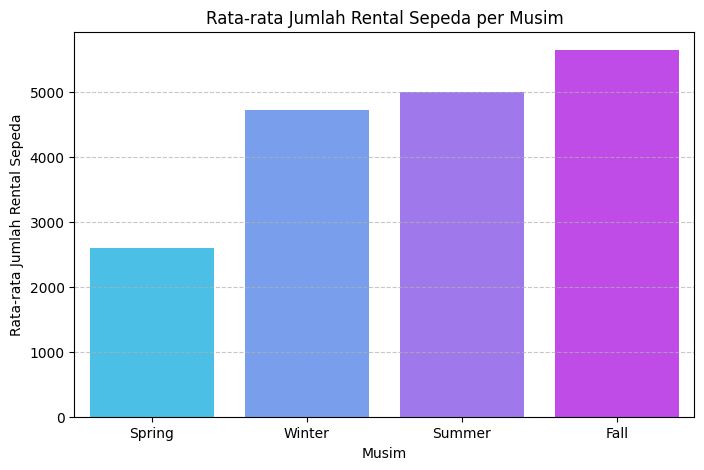

In [17]:
# Hitung rata-rata jumlah rental sepeda per musim
byseason_df = day_df.groupby('season')['cnt'].mean().sort_values()

# Visualisasi dengan bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=byseason_df.index, y=byseason_df.values, palette="cool")
plt.title("Rata-rata Jumlah Rental Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Rental Sepeda")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

Berdasarkan grafik di atas, Spring merupakan musim/season dengan rata-rata jumlah rental sepeda paling rendah. Untuk mencegah penurunan jumlah rental sepeda, maka dianjurkan untuk melakukan promosi pada musim/season Spring.

### Pertanyaan 2:
Kapan jam sepi untuk melaksanakan Happy Hour untuk meningkatkan rental sepeda?

In [20]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

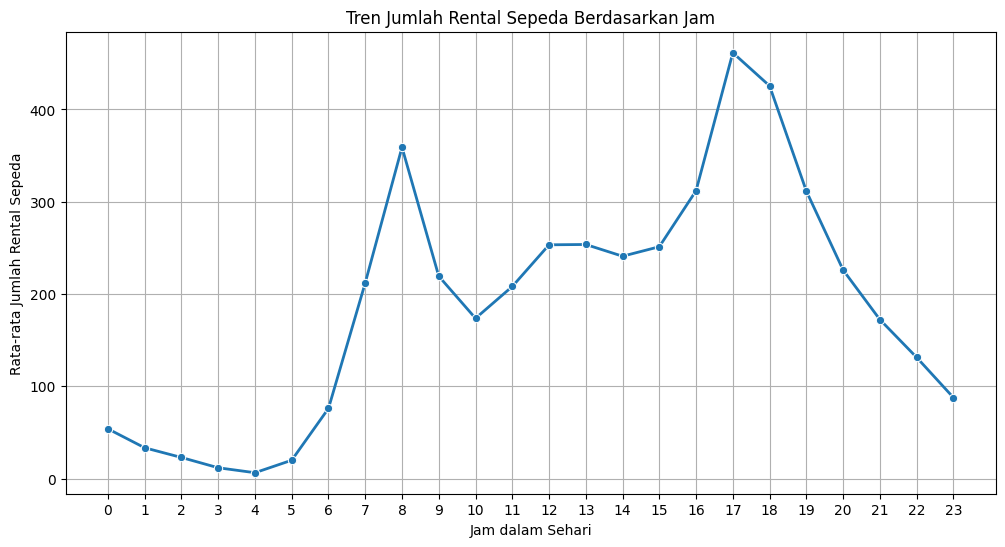

In [18]:
# Hitung rata-rata jumlah rental sepeda dari jamnya
byhour_df = hour_df.groupby("hr")["cnt"].mean()

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.lineplot(x=byhour_df.index, y=byhour_df.values, marker="o", linewidth=2)
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Rental Sepeda")
plt.title("Tren Jumlah Rental Sepeda Berdasarkan Jam")
plt.grid(True)

# Menampilkan plot
plt.show()

**Insight:**

Berdasarkan grafik di atas, terdapat 3 momen rental sepeda sepi:
- Jam Sibuk (10:00 - 12:00)
- Malam-Pagi (20:00 - 06:00)

Happy hour bisa dilakukan di jam-jam tersebut, entah "Happy Hour Pagi" ataupun "Happy Hour Jam Sibuk". Untuk "Happy Hour Malam" tidak disarankan karena diskon di jam ini tidak cukup menarik pelanggan karena mungkin mereka sedang beristirahat/tidak berniat menyewa, serta malam hari lebih berisiko bagi pesepeda karena kurangnya penerangan dan potensi bahaya(aksi kriminal).

## Conclusion

- Conclution pertanyaan 1(Pada musim/season apa sebaiknya dilakukan promosi untuk mencegah penurunan jumlah rental sepeda?):
  - Musim/Season Spring adalah musim/season yang cocok untuk dilakukan promosi untuk mencegah penurunan jumlah rental sepeda.
- Conclution pertanyaan 2 (Kapan jam sepi untuk melaksanakan Happy Hour untuk meningkatkan rental sepeda?):
  - Terdapat dua momen untuk melakukan diskon Happy Hour, yakni jam 04:00-06:00 dan 10:00-12:00